In [1]:
!pip install pandas matplotlib seaborn


In [2]:
import pandas as pd  # pandas lets us work with tables

# Load the CSV file
df = pd.read_csv('../datasets/student_performance.csv')  # "../" means go up one folder

# Show first 5 rows
df.head()

# Check if any data is missing
df.isnull().sum()


StudentID     0
Name          0
Gender        0
Age           0
Math          0
English       0
Science       0
Attendance    0
dtype: int64

In [3]:
# Ensure marks are numbers
for col in ['Math', 'English', 'Science']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate average score
df['AverageScore'] = df[['Math','English','Science']].mean(axis=1)

# Add Pass/Fail column (Pass if average >= 40)
df['Result'] = df['AverageScore'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

# Show updated table
df


,StudentID,Name,Gender,Age,Math,English,Science,Attendance,AverageScore,Result
0,1,Ali,Male,15,78,82,65,90,75.000000,Pass
1,2,Sara,Female,16,55,60,50,80,55.000000,Pass
2,3,John,Male,14,40,35,30,70,35.000000,Fail
3,4,Aisha,Female,15,90,85,88,95,87.666667,Pass
4,5,Ahmed,Male,16,60,70,65,85,65.000000,Pass


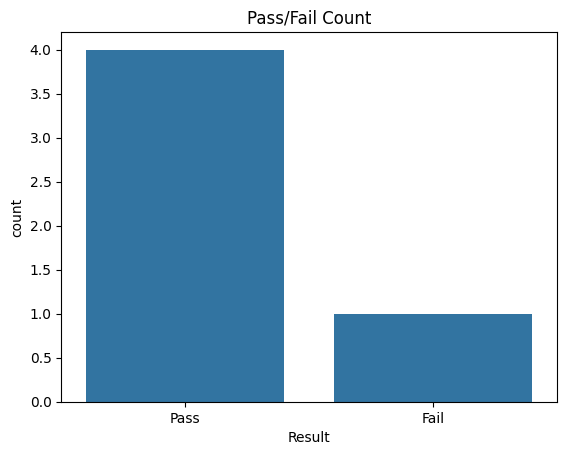

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Pass and Fail
sns.countplot(data=df, x='Result')
plt.title('Pass/Fail Count')
plt.show()


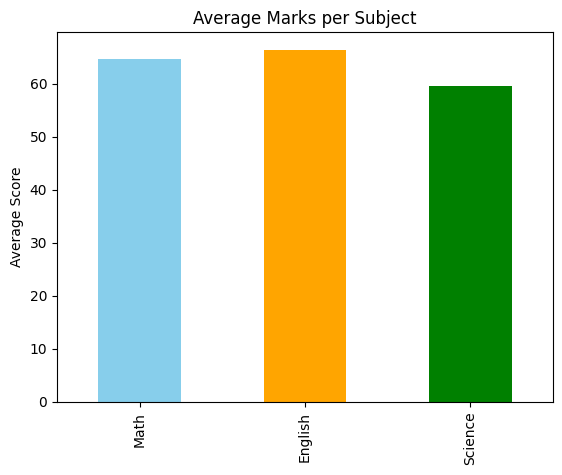

In [5]:
df[['Math','English','Science']].mean().plot(kind='bar', color=['skyblue','orange','green'])
plt.title('Average Marks per Subject')
plt.ylabel('Average Score')
plt.show()


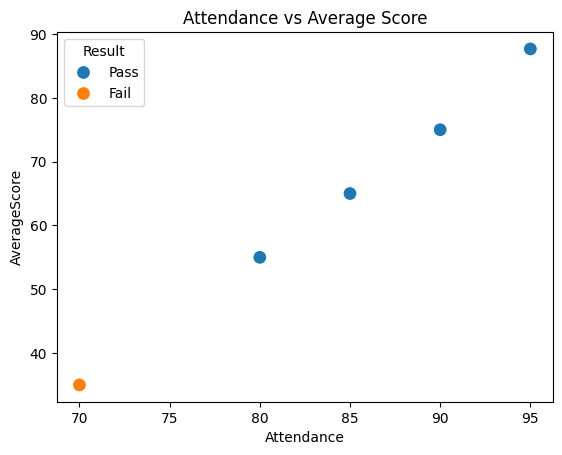

In [6]:
sns.scatterplot(data=df, x='Attendance', y='AverageScore', hue='Result', s=100)
plt.title('Attendance vs Average Score')
plt.show()

